In [1]:
from Utils import configReader as cr
from Utils import utils
import sklearn.neighbors as sn
import sklearn.preprocessing as sp
import sklearn.model_selection as sm
import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
params = cr.get_config('Q4', 'params')
pathDict = cr.get_config('Gen', 'path')
dataPath = pathDict['data']
trainPath = dataPath + 'Data/Train/'
testPath = dataPath + 'Data/Test/'
normDic = {'L2': 'euclidean', 'L1': 'manhattan'}

In [4]:
sizeList = [(i, i) for i in range(10, 53, 6)]
kList = [i for i in range(1, 12, 2)]

resultDic = {}
maxAcc = 0

normModel = sp.Normalizer()
for norm in normDic.keys():
    for size in tqdm.tqdm(sizeList):
        resultDic[size] = {}
        resultDic[size][norm] = []
        trainData, trainLabel = utils.load_all_data_as_vector(trainPath, size)
        trainData, valData, trainLabel, valLabel = sm.train_test_split(trainData, trainLabel, test_size=0.2)
        normModel.fit(trainData)
        for k in kList:
            model = sn.KNeighborsClassifier(n_neighbors=k, metric=normDic[norm])
            model.fit(trainData, trainLabel)
            acc = model.score(valData, valLabel)
            resultDic[size][norm].append(acc)
            if acc > maxAcc:
                maxAcc = acc
                bestSize = size
                bestK = k
                bestNorm = norm

print('best K: ' + str(bestK))
print('best norm: ' + str(bestNorm))
print('best size: ' + str(bestSize))
print('max Accuracy: ' + str(maxAcc))

100%|██████████| 8/8 [03:05<00:00, 23.22s/it]

best K: 1
best norm: L2
best size: (16, 16)
max Accuracy: 0.2529313232830821


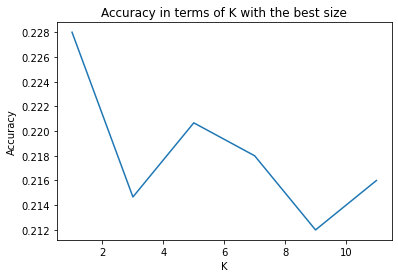

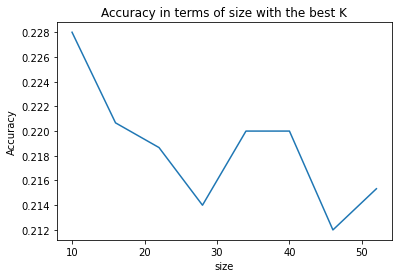

In [5]:
plt.plot(kList, resultDic[bestSize][bestNorm])
plt.title('Accuracy in terms of K with the best size')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()

sizeNumList = [i[0] for i in sizeList]
sizeAccList = []
for size in sizeList:
    sizeAccList.append(resultDic[size][bestNorm][bestK - 1])

plt.plot(sizeNumList, sizeAccList)
plt.title('Accuracy in terms of size with the best K')
plt.xlabel('size')
plt.ylabel('Accuracy')
plt.show()
